In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib as mpl
from numpy.fft import fft, ifft
from matplotlib.gridspec import GridSpec
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath,dsfont}')

In [2]:
# Function for finding start and end points of the activity cycles
# Input: Rho , precision
# Output: startpoints &  endpoints

def StartAndEndPoints(Rho, precision):
    t=np.arange(0,len(Rho))
    tmax=max(t)
    threshold=min(Rho)
    flag=False
    i=0
    startlocs=[]
    endlocs=[]
    while i<(tmax-10):
        if ( Rho[i]-threshold <= precision ):
            i=i+1
            continue
        first=i
        if (Rho[i-1] < Rho[i]):
            first=first-1
            if i==0:
                first=0
        startlocs.append(first)
        flag=True
        while(flag and i<tmax-1):
            i=i+1
            if ( Rho[i]-threshold <= precision ):
                flag=False
        endlocs.append(i)
        i=i+1;
        
    return(startlocs,endlocs)

In [3]:
# Function for finding maximum points of the activity cycles
# Input: Rho, startlocs, and endlocs
# Output: maxpoints 

def MaxPoints(Rho,startlocs,endlocs):
    maxpoints=[]
    if endlocs==[]:
        return(maxpoints)
    else:
        x=np.arange(len(startlocs))
        for i in x:
            interval=Rho[startlocs[i]:endlocs[i]]
            #m=max(interval)
            maxpoints.append(interval.argmax()+startlocs[i])
        return(maxpoints)

In [4]:
# Function for calculating burst width of a timeseri
# Input: Rho , precision
# Output: An array including the width of the burst at each time --> y

def BurstWidth(Rho,precision):
    tmax=len(Rho)
    y=np.zeros(len(Rho))
    startlocs , endlocs = StartAndEndPoints(Rho,precision)
    startlocs.append(tmax)
    endlocs.append(tmax)
    if startlocs==[]:
        startlocs.append(0)
    if endlocs==[]:
        endlocs.append(0)
    imax=len(endlocs)-1
    i=0
    smean=9 # mean value of a silence interval
    a=startlocs[0]
    while (i<imax):
        if startlocs[i+1]-endlocs[i] < smean:
            i=i+1
            continue
        else:
            b=endlocs[i]
            c=b-a
            for j in np.arange(a,b):
                y[j] = c
            a=startlocs[i+1]
            i=i+1
    if (a<10):
        if all(v < 0.01 for v in Rho):
            y=np.zeros(len(Rho))
        else:    
            y=np.ones(len(y))
            y[0], y[len(y)-1] = 0, 0
    else:
        ymax=max(y)
        if ymax!=0:
            y=y/ymax
    return(np.array(y))

In [5]:
# Function for calculating Shanon entropy of burst width
# Input: y (the array of burst width)
# Output: hB; the shanon entropy of the bursts for the input --> a not normalized number

def BurstShanon(y):
    y_round=np.round(y, decimals=2)
    l=list(y_round)
    hB=0
    distsB=np.zeros(101)
    for i in np.arange(101):
        distsB[i] = (l.count(i/100))/len(l)
        if (distsB[i]!=0):
            hB = hB - distsB[i] * np.log2(distsB[i])
    return(hB)

In [6]:
#loading data for N=2000, Threshold=4

#Seri1 0.1<Np<=1
D41=np.loadtxt('Seri1N2000T4.txt')
D41=np.delete(D41,0,axis=1)

#Seri2 0.01<Np<0.1
D42=np.loadtxt('Seri2N2000T4.txt')
D42=np.delete(D42,0,axis=1)
D42=np.delete(D42,9,axis=0)

#Seri3 0.001<Np<0.01
D43=np.loadtxt('Seri3N2000T4.txt')
D43=np.delete(D43,0,axis=1)

#Seri4 0.0001<Np<0.001
D44=np.loadtxt('Seri4N2000T4.txt')
D44=np.delete(D44,0,axis=1)

#Seri5 0.00001<Np<0.0001
D45=np.loadtxt('Seri5N2000T4.txt')
D45=np.delete(D45,0,axis=1)

#final matrix to send for fft for Threshold=4 (Mat4)
p1=np.concatenate( ( np.delete(D45,0,1),np.delete(D44,0,1) ), axis=0)
p2=np.concatenate( ( p1,np.delete(D43,0,1) ), axis=0)
p3=np.concatenate( ( p2,np.delete(D42,0,1) ), axis=0)
Mat4=np.concatenate( ( p3,np.delete(D41,0,1) ), axis=0)

#final matrix to send for fft for Threshold=4 (Mat4)
p1=np.concatenate( ( np.delete(D45,0,1),np.delete(D44,0,1) ), axis=0)
p2=np.concatenate( ( p1,np.delete(D43,0,1) ), axis=0)
p3=np.concatenate( ( p2,np.delete(D42,0,1) ), axis=0)
Mat4=np.concatenate( ( p3,np.delete(D41,0,1) ), axis=0)

In [7]:
#Power for Mat4

lag=1000
fftMat=[]
for i in np.arange(0,len(Mat4)):
    sig=Mat4[i,:]
    t=np.arange(0,len(sig))
    L=len(t[lag:])
    Fs = 1  #sampling frequency
    Y=fft(sig[lag:])
    P2 = np.abs(Y/L)
    P1 = P2[0:int(L/2)+1]
    end=len(P1)-1
    P1[1:end] = 2*P1[1:end]
    x=np.arange(0,(int(L/2)+1))
    f = Fs*x/L
    fftMat.append(P1)  

fftMat=np.rot90(fftMat)
fftMat=np.flipud(fftMat)

In [8]:
print(len(fftMat)*0.4)

3800.4


Text(0.14, 0.45, '$Silence$')

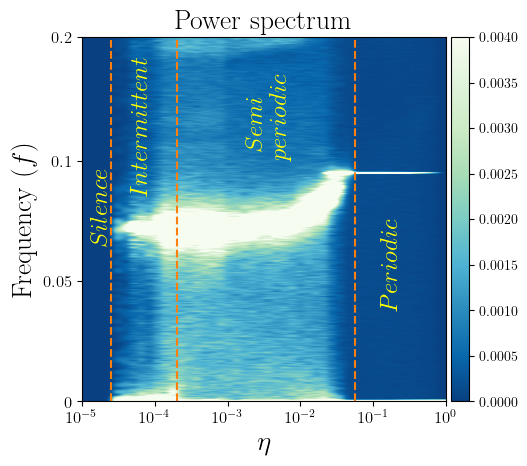

In [17]:
exMat=fftMat[:3800]
colormap='GnBu_r'

fig, axes = plt.subplots(figsize=(5,5))

ax1= plt.subplot()
im=ax1.imshow(exMat, cmap=colormap, vmin=0, vmax=0.004, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.title('Threshold = 4')
plt.ylabel('Frequency~($f$)', fontsize=20)
ax1.set_yticks([0, .33, .66, 1])
ax1.set_yticklabels(['0', '0.05', '0.1', '0.2'])
ax1.set_xticks([0, .2, .4, .6, .8, 1])
ax1.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
plt.xlabel(r'$\eta$', fontsize=20)
plt.plot([0.75,0.75],[0,1], '--', linewidth = 1.5, color='C1')
plt.plot([0.26,0.26],[0,1], '--', linewidth = 1.5, color='C1')
plt.plot([0.08,0.08],[0,1], '--', linewidth = 1.5, color='C1')
plt.title('Power~spectrum',fontsize=20)
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
#cbar.set_label('Power~spectrum',fontsize=20, rotation=90)

plt.figtext(0.72, 0.32, '$Periodic$', fontsize=18, fontweight='bold', color='yellow', rotation=90)
plt.figtext(0.45, 0.64, '$Semi$', fontsize=18, fontweight='bold', color='yellow', rotation=90)
plt.figtext(0.5, 0.62, '$periodic$', fontsize=18, fontweight='bold', color='yellow', rotation=90)
plt.figtext(0.22, 0.55, '$Intermittent$', fontsize=18, fontweight='bold', color='yellow', rotation=90)
plt.figtext(0.14, 0.45, '$Silence$', fontsize=18, fontweight='bold', color='yellow', rotation=90)


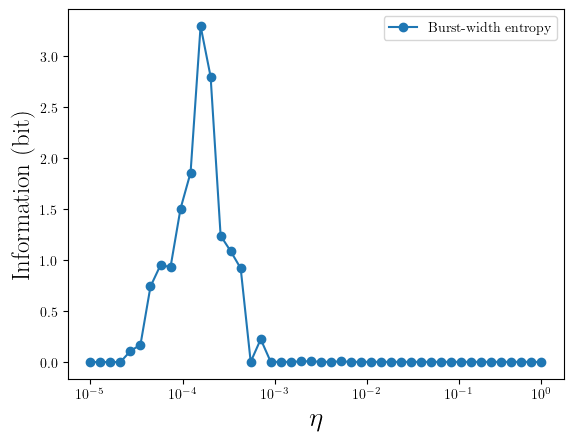

In [18]:
# Calculating Burst-width entropy --> hB
hB=[]
precision=0.005
for i in np.arange(len(Mat4)):
    y=BurstWidth(Mat4[i,:],precision)
    hB.append(BurstShanon(y))

#Plotting
plt.plot(hB, '-o', label='Burst-width entropy')
plt.xlabel(r'$\eta$', fontsize=20)
plt.ylabel('Information (bit)', fontsize=18)
labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$']
plt.xticks([0, 9.2, 18.4, 27.6, 36.8, 45], labels)
plt.legend()

In [19]:
# Functin for loading data 
def load_data(data_name_without_Seri_number):  
    #Seri1 0.1<Np<=1
    n_1 = 'Seri1' + data_name_without_Seri_number
    D_1=np.loadtxt(n_1)
    D_1=np.delete(D_1,0,axis=1)

    #Seri2 0.01<Np<0.1
    n_2 = 'Seri2' + data_name_without_Seri_number
    D_2=np.loadtxt(n_2)
    D_2=np.delete(D_2,0,axis=1)
    D_2=np.delete(D_2,9,axis=0)

    #Seri3 0.001<Np<0.01
    n_3 = 'Seri3' + data_name_without_Seri_number
    D_3=np.loadtxt(n_3)
    D_3=np.delete(D_3,0,axis=1)

    #Seri4 0.0001<Np<0.001
    n_4 = 'Seri4' + data_name_without_Seri_number
    D_4=np.loadtxt(n_4)
    D_4=np.delete(D_4,0,axis=1)

    #Seri5 0.00001<Np<0.0001
    n_5 = 'Seri5' + data_name_without_Seri_number
    D_5=np.loadtxt(n_5)
    D_5=np.delete(D_5,0,axis=1)

    #final matrix to send for fft (MatI)
    p1=np.concatenate( ( np.delete(D_5,0,1),np.delete(D_4,0,1) ), axis=0)
    p2=np.concatenate( ( p1,np.delete(D_3,0,1) ), axis=0)
    p3=np.concatenate( ( p2,np.delete(D_2,0,1) ), axis=0)
    Mat=np.concatenate( ( p3,np.delete(D_1,0,1) ), axis=0)

    return(Mat)

In [21]:
# Loading data 
W_I=4

MatLE80=load_data('ElinkN2000K200D4We1Wi4Ne80.txt')
MatLI80=load_data('IlinkN2000K200D4We1Wi4Ne80.txt')
MatNE80=load_data('EnodeN2000K200D4We1Wi4Ne80.txt')
MatNI80=load_data('InodeN2000K200D4We1Wi4Ne80.txt')

MatN80=MatNE80+MatNI80
MatCurrent80=MatLE80-W_I*MatLI80

(1950.0, 2350.0)

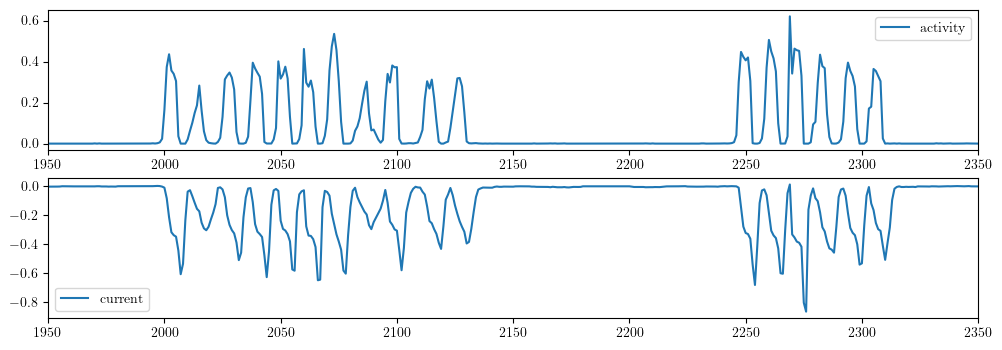

In [22]:
# Plot

row=10

x_left=1950  #19000
x_right=2350

plt.figure(figsize=(12,4))
rho=MatN80[row,:]
current=MatCurrent80[row,:]
plt.subplot(2,1,1)
plt.plot(rho, label='activity')
plt.legend()
plt.xlim([x_left,x_right])
plt.subplot(2,1,2)
plt.plot(current, label='current')
plt.legend()
plt.xlim([x_left,x_right])

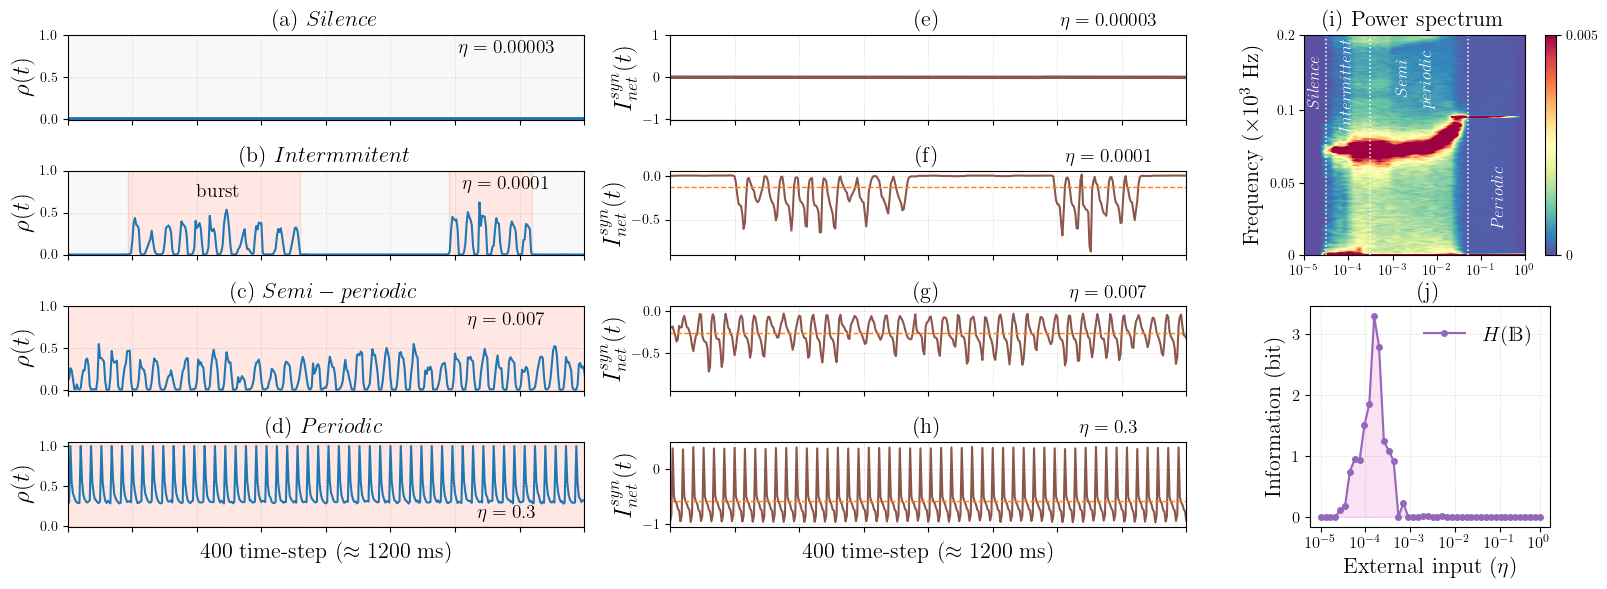

In [27]:
from matplotlib.gridspec import GridSpec
fig=plt.figure(figsize=(16,6),facecolor='white')
gs=GridSpec(8,16)

fs=16
l=1.5
alp=0.15

col='C0'
colI='C5'
Bcol='tomato'
Scol='lightgrey'
colmap='Spectral_r'  #'RdBu_r'

X=np.arange(46)

x_left=1950
x_right=2350

row=4
ax1=fig.add_subplot(gs[0:2,0:6])
ax1.text(.85,.78,r'$\eta = 0.00003$', fontsize=fs-2,horizontalalignment='center',transform=ax1.transAxes)
sig=MatN80[row,:]
ax1.axvspan(x_left,x_right, color=Scol, alpha=alp) 
plt.plot(sig,lw=l+1,color=col)
plt.title('(a)~$Silence$', fontsize=fs)
plt.ylabel(r'$\rho(t)$', fontsize=fs+2)
plt.ylim(-0.01,1)
plt.xlim([x_left,x_right])
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
ax1.set_xticklabels([])
plt.grid(linestyle = ':', lw=0.7, alpha=0.3, color='C7')


row=4
ax7=fig.add_subplot(gs[0:2,6:12])
ax7.text(.85,1.1,r'$\eta = 0.00003$', fontsize=fs-2,horizontalalignment='center',transform=ax7.transAxes)
sig=MatCurrent80[row,:]
#ax7.axvspan(x_left,x_right, color=Scol, alpha=alp) 
plt.plot(sig,lw=l+1,color=colI)
plt.title('(e)', fontsize=fs)
plt.ylabel(r'$I_{net}^{syn}(t)$', fontsize=fs+2)
plt.ylim(-1.01,1.01)
plt.xlim([x_left,x_right])
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
ax7.set_xticklabels([])
plt.grid(linestyle = ':', lw=0.7, alpha=0.3, color='C7')


row=10
ax2=fig.add_subplot(gs[2:4,0:6])
ax2.text(.85,.78,r'$\eta = 0.0001$', fontsize=fs-2,horizontalalignment='center',transform=ax2.transAxes)
sig=MatN80[row,:]
ax2.axvspan(0,1997 , alpha=alp, color=Scol) 
ax2.axvspan(1997, 2130, alpha=alp, color=Bcol) 
ax2.axvspan(2130, 2245, alpha=alp, color=Scol)
ax2.axvspan(2245, 2310, alpha=alp, color=Bcol)
ax2.axvspan(2310, 3000, alpha=alp, color=Scol)
plt.plot(sig,lw=l,color=col)
plt.title('(b)~$Intermmitent$', fontsize=fs)
plt.ylim(-0.01,1)
plt.xlim([x_left,x_right])
plt.ylabel(r'$\rho(t)$', fontsize=fs+2)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
ax2.set_xticklabels([])
plt.grid(linestyle = ':', lw=0.7, alpha=0.3, color='C7')


row=10
ax8=fig.add_subplot(gs[2:4,6:12])
ax8.text(.85,1.1,r'$\eta = 0.0001$', fontsize=fs-2,horizontalalignment='center',transform=ax8.transAxes)
sig=MatCurrent80[row,:]
plt.plot(sig,lw=l,color=colI)
mean_current=sum(sig[x_left:x_right])/400
plt.plot(mean_current*np.ones(len(sig)), '--', color='C1', lw=l-0.5)
plt.title('(f)', fontsize=fs)
#plt.ylim(-0.01,1)
plt.xlim([x_left,x_right])
plt.ylabel(r'$I_{net}^{syn}(t)$', fontsize=fs+2)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
ax8.set_xticklabels([])
plt.grid(linestyle = ':', lw=0.7, alpha=0.3, color='C7')



row=25
ax3=fig.add_subplot(gs[4:6,0:6])
ax3.text(.85,.78,r'$\eta = 0.007$', fontsize=fs-2,horizontalalignment='center',transform=ax3.transAxes)
sig=MatN80[row,:]
ax3.axvspan(x_left,x_right, alpha=alp, color=Bcol)
plt.plot(sig,lw=l,color=col)
plt.title('(c)~$Semi-periodic$', fontsize=fs)
plt.ylim(-0.01,1)
plt.xlim([x_left,x_right])
plt.ylabel(r'$\rho(t)$', fontsize=fs+2)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
ax3.set_xticklabels([])
plt.grid(linestyle = ':', lw=0.7, alpha=0.3, color='C7')


row=25
ax9=fig.add_subplot(gs[4:6,6:12])
ax9.text(.85,1.1,r'$\eta = 0.007$', fontsize=fs-2,horizontalalignment='center',transform=ax9.transAxes)
sig=MatCurrent80[row,:]
plt.plot(sig,lw=l,color=colI)
mean_current=sum(sig[x_left:x_right])/400
plt.plot(mean_current*np.ones(len(sig)), '--', color='C1', lw=l-0.5)
plt.title('(g)', fontsize=fs)
#plt.ylim(-0.01,1)
plt.xlim([x_left,x_right])
plt.ylabel(r'$I_{net}^{syn}(t)$', fontsize=fs+2)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
ax9.set_xticklabels([])
plt.grid(linestyle = ':', lw=0.7, alpha=0.3, color='C7')


row=38
ax4=fig.add_subplot(gs[6:,0:6])
ax4.text(.85,.1,r'$\eta = 0.3$', fontsize=fs-2,horizontalalignment='center',transform=ax4.transAxes)
sig=MatN80[row,:]
ax4.axvspan(x_left,x_right, alpha=alp, color=Bcol)
plt.plot(sig,lw=l,color=col)
plt.title('(d)~$Periodic$', fontsize=fs)
plt.ylim(-0.01,1.05)
plt.xlim([x_left,x_right])
plt.ylabel(r'$\rho(t)$', fontsize=fs+2)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
ax4.set_xticklabels([])
plt.xlabel('400~time-step~'+r'($\approx 1200$~ms)', fontsize=fs)
plt.grid(linestyle = ':', lw=0.7, alpha=0.3, color='C7')


row=38
ax10=fig.add_subplot(gs[6:,6:12])
ax10.text(.85,1.1,r'$\eta = 0.3$', fontsize=fs-2,horizontalalignment='center',transform=ax10.transAxes)
sig=MatCurrent80[row,:]
plt.plot(sig,lw=l,color=colI)
mean_current=sum(sig[x_left:x_right])/400
plt.plot(mean_current*np.ones(len(sig)), '--', color='C1', lw=l-0.5)
plt.title('(h)', fontsize=fs)
#plt.ylim(-0.01,1)
plt.xlim([x_left,x_right])
plt.xlabel('400~time-step~'+r'($\approx 1200$~ms)', fontsize=fs)
plt.ylabel(r'$I_{net}^{syn}(t)$', fontsize=fs+2)
plt.xticks(fontsize=fs-6)
plt.yticks(fontsize=fs-6)
ax10.set_xticklabels([])
plt.grid(linestyle = ':', lw=0.7, alpha=0.3, color='C7')


ax5=fig.add_subplot(gs[0:4,12:])
im=ax5.imshow(exMat, cmap=colmap, vmin=0, vmax=0.005, interpolation = "gaussian", extent=[0,1,0,1], origin='lower')
plt.yticks(fontsize=fs-6)
plt.xticks(fontsize=fs-6)
plt.ylabel('Frequency~'+r'($\times 10^3$~Hz)', fontsize=fs)
ax5.set_yticks([0, .33, .66, 1])
ax5.set_yticklabels(['0', '0.05', '0.1', '0.2'])
ax5.set_xticks([0, .2, .4, .6, .8, 1])
ax5.set_xticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
plt.plot([0.74,0.74],[0,1], ':', linewidth = 1.1, color='white')
plt.plot([0.3,0.3],[0,1], ':', linewidth = 1.1, color='white')
plt.plot([0.10,0.10],[0,1], ':', linewidth = 1.1, color='white')
plt.title('(i)~Power~spectrum',fontsize=fs)  
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = plt.colorbar(im, cax=cax, ticks=[0, 0.005])
cbar.ax.set_yticklabels(['0', '0.005'])
#cbar.set_label('Power~spectrum',fontsize=20, rotation=90)
plt.figtext(0.93, 0.6, '$Periodic$', fontsize=fs-4, fontweight='bold', color='white',  rotation=90)
plt.figtext(0.87, 0.82, '$Semi$', fontsize=fs-4, fontweight='bold', color='white', rotation=90)
plt.figtext(0.885, 0.8, '$periodic$', fontsize=fs-4, fontweight='bold', color='white', rotation=90)
plt.figtext(0.835, 0.76, '$Intermittent$', fontsize=fs-4, fontweight='bold', color='white', rotation=90)
plt.figtext(0.815, 0.8, '$Silence$', fontsize=fs-4, fontweight='bold', color='white', rotation=90)
plt.figtext(0.12, 0.65, 'burst', fontsize=fs-2, fontweight='bold')


ax6=fig.add_subplot(gs[4:,12:])
plt.plot(hB, '-o', color='C4', markersize=4, lw=1.5, label=r'$H(\mathds{B})$')
plt.xlabel(r'External input ($\eta$)', fontsize=fs)
plt.ylabel('Information (bit)', fontsize=fs)
plt.title('(j)~', fontsize=fs)
plt.xticks(fontsize=fs-4)
plt.yticks(fontsize=fs-4)
labels=['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$']
plt.xticks([0, 9.2, 18.4, 27.6, 36.8, 45], labels)
plt.grid(linestyle = ':', lw=0.7, alpha=0.3,  color='C7')
plt.fill_between(X,hB,where=(X<=20), color= 'C6', alpha=0.2) #, label='$Intermittent$')
plt.legend(frameon=False, fontsize=fs-1)
ax6.set_aspect(aspect=12.5)

plt.subplots_adjust(top=0.92, bottom=0.1, left=0.04, right=0.99, hspace=3, wspace=6)
                   
#plt.savefig('fig1.pdf')